# Assignment 4

Author: Luis Eduardo San Martin

We use this notebook to explain the application of the clustering code in the DonorsChoose dataset.

In [25]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, './scripts')
import pipeline_clustering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading the data

In [2]:
file = './data/projects_2012_2013.csv'
df = pipeline_clustering.read(file)
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


## Preparing the dataframe

This are the steps we'll follow:

1. Impute missing values in `df`
2. Generate dummies for the discrete variables we have
3. Define the columns we'll use as features for clustering

Then:

1. Imputing missing values in `df`:


* Replacing missing values with the median:

In [3]:
median_cols = ['students_reached']
for col in median_cols:
    pipeline_clustering.fill_nas_median(df, col)

* Replacing missing values with the discrete value 'None':

In [4]:
none_label_cols = ['primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', \
                   'resource_type', 'grade_level']
for col in none_label_cols:
    pipeline_clustering.fill_nas_other(df, col, 'None')

2. Generate dummies for the discrete variables we have

In [5]:
pipeline_clustering.columns_types(df)

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
teacher_prefix                             object
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
resource_type                              object
poverty_level                              object


In [6]:
categorical = ['school_state', 'school_magnet', 'school_metro', 'teacher_prefix', \
               'primary_focus_subject', 'primary_focus_area', 'secondary_focus_area', \
               'eligible_double_your_impact_match', 'secondary_focus_area', 'resource_type', \
               'poverty_level', 'grade_level', 'school_charter']

for col in categorical:
    pipeline_clustering.create_dummies(df, col)

3. Defining the columns we'll use for clustering:

In [7]:
pipeline_clustering.columns_list(df)

projectid
teacher_acctid
schoolid
school_ncesid
school_latitude
school_longitude
school_city
school_state
school_metro
school_district
school_county
school_charter
school_magnet
teacher_prefix
primary_focus_subject
primary_focus_area
secondary_focus_subject
secondary_focus_area
resource_type
poverty_level
grade_level
total_price_including_optional_support
students_reached
eligible_double_your_impact_match
date_posted
datefullyfunded
school_state_IL
school_state_CA
school_state_NY
school_state_MI
school_state_AZ
school_state_ME
school_state_MO
school_state_FL
school_state_KY
school_state_GA
school_state_TX
school_state_IN
school_state_NC
school_state_SC
school_state_CT
school_state_OH
school_state_MN
school_state_WV
school_state_WA
school_state_TN
school_state_OK
school_state_DC
school_state_MD
school_state_MS
school_state_ID
school_state_MA
school_state_IA
school_state_AK
school_state_WI
school_state_NV
school_state_LA
school_state_NE
school_state_CO
school_state_KS
school_state_OR
sch

We'll arbitrarily select as clustering features some of the dummies we generated from our categorical variables and the two continuous variables we have in the dataset (`total_price_including_optional_support`, `students_reached`).

In [8]:
X = ['total_price_including_optional_support', 'students_reached', \
     'school_metro_urban', 'school_metro_suburban', 'school_metro_rural', 'school_metro_nan', \
     'primary_focus_area_Math & Science', 'primary_focus_area_History & Civics', \
     'primary_focus_area_Literacy & Language', 'primary_focus_area_Applied Learning', \
     'primary_focus_area_Music & The Arts', 'primary_focus_area_Health & Sports', \
     'primary_focus_area_Special Needs', 'primary_focus_area_None', \
     'resource_type_Supplies', 'resource_type_Books', 'resource_type_Technology', \
     'resource_type_Other', 'resource_type_Trips', 'resource_type_Visitors', \
     'resource_type_None', 'poverty_level_highest poverty', 'poverty_level_high poverty', \
     'poverty_level_low poverty', 'poverty_level_moderate poverty', 'grade_level_Grades PreK-2', \
     'grade_level_Grades 3-5', 'grade_level_Grades 9-12', 'grade_level_Grades 6-8', \
     'grade_level_None']

## Generating and analyzing clusters

We'll generate a total of four clusters.

In [18]:
pipeline_clustering.add_cluster_to_df(4, df, X, 'clusters_4')

In [19]:
pipeline_clustering.tabulate(df, 'clusters_4')

clusters_4
0    120160
1       265
2      4541
3        10
dtype: int64


We see that a majority of data points were classified in the cluster zero. A very small number of data points are in the cluster three.

### Generating some graphs

<module 'matplotlib.pyplot' from '/home/luis_eduardo/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

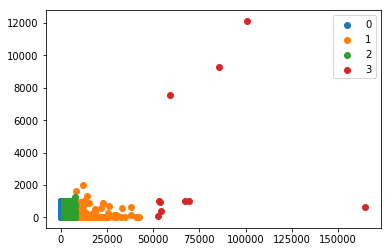

In [28]:
pipeline_clustering.plot_cluster_and_two_variables(df, 'clusters_4', 'total_price_including_optional_support', 'students_reached')

The projects (data points) from each cluster are different in the number of students they reach, and clearly divergent in the total price of each project. Given that all the other variables we included were dummies and thus had a range of 1, it is clear that these two variabes are the ones determining the clusters, especially `total_price_including_optional_support`.

We'll get some descriptive statistics for each clustering variable (the ones conforming `X`) for each cluster.


Cluster 0

Cluster 2

Cluster 1

Cluster 3


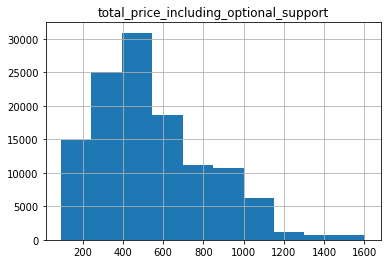

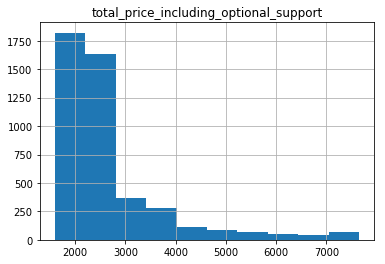

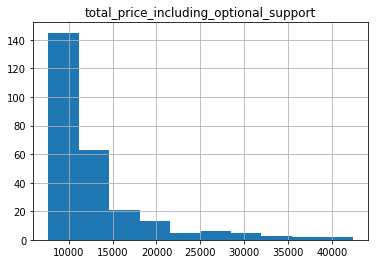

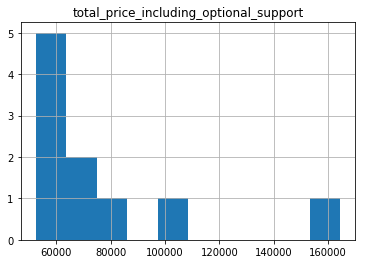

In [43]:
for cluster in df['clusters_4'].unique():
    print('\nCluster', cluster)
    pipeline_clustering.histogram(df[df['clusters_4']==cluster], 'total_price_including_optional_support')

In [38]:
for cluster in df['clusters_4'].unique():
    print('\nCluster', cluster)
    pipeline_clustering.describe(df[df['clusters_4']==cluster][X])


Cluster 0
count    120160.000000
mean        545.446027
std         272.803122
min          92.000000
25%         338.050000
50%         501.520000
75%         703.742500
max        1605.330000
Name: total_price_including_optional_support, dtype: float64
count    120160.000000
mean         92.808098
std         153.067892
min           1.000000
25%          23.000000
50%          30.000000
75%         100.000000
max         999.000000
Name: students_reached, dtype: float64
count    120160.000000
mean          0.498444
std           0.500000
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: school_metro_urban, dtype: float64
count    120160.000000
mean          0.262974
std           0.440250
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: school_metro_suburban, dtype: float64
count    120160.000000
mean          0.116278
std           0.320560

count    265.000000
mean       0.169811
std        0.376177
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: resource_type_Supplies, dtype: float64
count    265.000000
mean       0.037736
std        0.190917
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: resource_type_Books, dtype: float64
count    265.000000
mean       0.475472
std        0.500343
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: resource_type_Technology, dtype: float64
count    265.000000
mean       0.067925
std        0.252092
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: resource_type_Other, dtype: float64
count    265.000000
mean       0.241509
std        0.428808
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: resource_type_Trip

As we had already noticed, the one major difference between across all the cluster members is in the feature `total_price_including_optional_support`. There are also some differences in `students_reached`, possibly due to the correlation between that feature and the